<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Send a Flipbook of Variable Stars Images to Zooniverse</b> <br>
Author(s): Becky Nevin and Sreevani Jarugula <br>
Contact author: Becky Nevin<br>
Last verified to run: 2024-03-07 <br>
LSST Science Pipelines version: Weekly 2024_04 <br>
Container size: small or medium <br>
Targeted learning level: intermediate

**Description:**
Query and send a flipbook of variable star images from RSP to Zooniverse

**Skills:** Use various TAP tables, including joining multiple tables. Get calexp images. Extract time-series photometry.

**LSST Data Products:** TAP tables dp02_dc2_catalogs.MatchesTruth, TruthSummary, ForcedSource, CcdVisit<br>

**Packages:** rubin.cistci, astropy, lsst.daf.butler, lsst.afw.display, lsst.geom 

**Credit:** Rubin tutorial notebooks 03a, 04a, 04b, 07b, and 08

**Support:** Support is available and questions are welcome - (cscience@lsst.org)

## 1. Introduction <a class="anchor" id="first-bullet"></a>
This notebook will guide a PI through the process of sending a flipbook of five images of a variable star from the Rubin Science Platform (RSP) to the Zooniverse. It is recommended to run the `01_Introduction_to_Citsci_Pipeline.ipynb` notebook first, which provides an introduction to sending images to Zooniverse.

### 1.1 Package imports <a class="anchor" id="second-bullet"></a>

#### Install Pipeline Package

First, install the Rubin Citizen Science Pipeline package by doing the following:

1. Open up a New Launcher tab
2. In the "Other" section of the New Launcher tab, click "Terminal"
3. Use `pip` to install the `rubin.citsci` package by entering the following command:
```
pip install rubin.citsci
```
Note that this package will soon be installed directly on RSP.

4. Confirm the next cell containing `from rubin.citsci import pipeline` works as expected and does not throw an error

In [1]:
from rubin.citsci import pipeline
import utils
import numpy as np
import pandas as pd
import os
import astropy
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import lsst.afw.display as afwdisplay
afwdisplay.setDefaultBackend("matplotlib")

### 1.2 Define functions and parameters <a class="anchor" id="third-bullet"></a>
If you haven't already, [make a Zooniverse account](https://www.zooniverse.org/accounts/registerhttps://www.zooniverse.org/accounts/register) and create your project.

IMPORTANT: Your Zooniverse project must be set to "public", a "private" project will not work. Select this setting under the "Visibility" tab, (it does not need to be set to live). 

Supply the email associated with your Zooniverse account and project slug below.

A "slug" is the string of your Zooniverse username and your project name without the leading forward slash, for instance: "username/project-name". [Click here for more details](https://www.zooniverse.org/talk/18/967061?comment=1898157&page=1).


In [2]:
email = "beckynevin@gmail.com"
slug_name = "rebecca-dot-nevin/test-project"
print("Running utilities to establish a link with Zooniverse")
print("Enter your Zooniverse username followed by password below")
cit_sci_pipeline = pipeline.CitSciPipeline()
cit_sci_pipeline.login_to_zooniverse(slug_name, email)

Running utilities to establish a link with Zooniverse
Enter your Zooniverse username followed by password below
Enter your Zooniverse credentials...


Username:  rebecca.nevin
 ········


You now are logged in to the Zooniverse platform.


## 2. Make a subject set of a variable star to send to Zooniverse <a class="anchor" id="fourth-bullet"></a>
A subject set is a collection of data (images, plots, etc) that are shown to citizen scientists. It is also the unit of data that is sent to Zooniverse.

This notebook curates a subject set of flipbook images from a variable star to send to Zooniverse. This can be modified to create your own subject set. Your subject set must have 100 objects or less in the testing phase before your project is approved by the EPO Data Rights panel. 

This example makes one set of image cutouts of a confirmed variable star at five different moments in time.

### 2.1 Initialize the Butler

In [3]:
config = 'dp02'
collection = '2.2i/runs/DP0.2'
service, butler, skymap = utils.setup_query_tools(config, collection)

### 2.2 Get familiar with the DiaObject and ForcedSourceOnDiaObject tables
These are _difference_ image tables, created by identifying objects not present in the template deepcoadd images. For more information, see https://lse-163.lsst.io/.


In [4]:
pd.set_option('display.max_rows', 200, 'display.max_colwidth', 1000)
results_diaobject = service.search("SELECT column_name, datatype, description,\
                          unit from TAP_SCHEMA.columns\
                          WHERE table_name = 'dp02_dc2_catalogs.DiaObject'")

In [5]:
results_diaobject.to_table().to_pandas()

,column_name,datatype,description,unit
0,decl,double,Mean Declination of DIASources in the diaObject,deg
1,diaObjectId,long,Unique id.,
2,gPSFluxChi2,double,Chi^2 statistic for the scatter of gPSFlux around gPSFluxMean,
3,gPSFluxErrMean,double,Mean of the diaSource PSF flux uncertainties,
4,gPSFluxLinearIntercept,double,y-intercept of a linear model fit to diaSource PSF flux vs time,
5,gPSFluxLinearSlope,double,Slope of a linear model fit to diaSource PSF flux vs time,
6,gPSFluxMAD,double,Median absolute deviation of diaSource PSF flux. Does not include scale factor for comparison to sigma,
7,gPSFluxMax,double,Maximum diaSource PSF flux,
8,gPSFluxMaxSlope,double,Maximum ratio of time ordered deltaFlux / deltaTime,
9,gPSFluxMean,double,Weighted mean of diaSource PSF flux,


diaObjectId is the unique ID for each object in the table; note that these are different IDs from the ObjectId in the Object table. From https://lse-163.lsst.io/:

>There is no direct DIASource-to-Object match: in general, a time-domain object is not necessarily the same astrophysical object as a static-sky object, even if the two are positionally coincident (eg. an asteroid overlapping a galaxy). Therefore, adopted data model emphasizes that having a DIASource be positionally coincident with an Object does not imply it is physically related to it. Absent other information, the least presumptuous data model relationship is one of positional association, not physical identity.

It is also necessary to have visit information to create images for each visit. Obtain visit information from the ForcedSourceOnDiaObject table (below). 

In [6]:
results_forceddiaobject = service.search(
    "SELECT column_name, datatype, description, unit "
    "FROM TAP_SCHEMA.columns "
    "WHERE table_name = 'dp02_dc2_catalogs.ForcedSourceOnDiaObject'"
)

In [7]:
results_forceddiaobject.to_table().to_pandas()

,column_name,datatype,description,unit
0,band,char,Abstract filter that is not associated with a particular instrument,
1,ccdVisitId,long,Unique ID of visit and detector for which forced photometry was performed. Primary Key of the CcdVisit Table.,
2,coord_dec,double,Fiducial ICRS Declination of DiaObject centroid used for database indexing,deg
3,coord_ra,double,Fiducial ICRS Right Ascension of DiaObject centroid used for database indexing,deg
4,diaObjectId,long,Unique DiaObject ID. Primary Key of the DiaObject Table,
5,forcedSourceOnDiaObjectId,long,Unique ID of forced source. Primary Key.,
6,localBackground_instFlux,double,Background in annulus around source,count
7,localBackground_instFluxErr,double,1-sigma uncertainty on the background in an annulus around source,count
8,localPhotoCalib,double,Local approximation of the PhotoCalib calibration factor at the location of the src.,
9,localPhotoCalib_flag,boolean,Set for any fatal failure,


Finally, examine the CcdVisit catalog, which is matched with the ForcedSourceOnDiaObject catalog in order to retrieve timing information of when the exposure was taken.

In [8]:
results_ccdvisit = service.search("SELECT column_name, datatype, description,\
                          unit from TAP_SCHEMA.columns\
                          WHERE table_name = 'dp02_dc2_catalogs.CcdVisit'")

In [9]:
results_ccdvisit.to_table().to_pandas()

,column_name,datatype,description,unit
0,band,char,Name of the band used to take the exposure where this source was measured. Abstract filter that is not associated with a particular instrument.,
1,ccdVisitId,long,Primary key (unique identifier).,
2,darkTime,double,"Average dark current accumulation time, accurate to 10ms.",s
3,decl,double,Declination of CCD center.,deg
4,detector,long,Detector ID. A detector associated with a particular instrument (not an observation of that detector),
5,expMidpt,char,"Midpoint for exposure. TAI, accurate to 10ms.",
6,expMidptMJD,double,"Midpoint for exposure in MJD. TAI, accurate to 10ms.",d
7,expTime,double,"Spatially-averaged duration of exposure, accurate to 10ms.",s
8,llcdec,double,Declination of lower left corner.,deg
9,llcra,double,RA of lower left corner.,deg


In [10]:
del results_forceddiaobject, results_diaobject, results_ccdvisit

### 2.3 Do a search for variable stars
Perform this search by joining the three catalogs explored above.

For more details, please see the `DP02_07b_Variable_Star_Lightcurves.ipynb` notebook in the tutorial notebooks by Jeff Carlin and Ryan Lau. All the code in this section is derivative of that notebook.

Use the coordinates of a known variable star.

In [11]:
ra_known_rrl = 62.1479031
dec_known_rrl = -35.799138

The below query will return a massive list of sources, some of which are repeat object IDs.

In [12]:
query = "SELECT diao.diaObjectId, "\
        "fsodo.forcedSourceOnDiaObjectId, "\
        "diao.ra, diao.decl, "\
        "diao.gPSFluxNdata, "\
        "diao.gPSFluxStetsonJ, "\
        "diao.gTOTFluxMean, diao.gTOTFluxSigma, "\
        "scisql_nanojanskyToAbMag(fsodo.psfFlux) as psfMag, "\
        "fsodo.diaObjectId, "\
        "fsodo.ccdVisitId, fsodo.band, fsodo.psfFlux, fsodo.psfFluxErr, "\
        "fsodo.psfDiffFlux, fsodo.psfDiffFluxErr, "\
        "cv.expMidptMJD, cv.detector, cv.visitId, "\
        "scisql_nanojanskyToAbMag(fsodo.psfFlux) as fsodo_gmag "\
        "FROM dp02_dc2_catalogs.DiaObject as diao "\
        "JOIN dp02_dc2_catalogs.ForcedSourceOnDiaObject as fsodo "\
        "ON fsodo.diaObjectId = diao.diaObjectId "\
        "JOIN dp02_dc2_catalogs.CcdVisit as cv "\
        "ON cv.ccdVisitId = fsodo.ccdVisitId "\
        "WHERE diao.gTOTFluxSigma/diao.gTOTFluxMean > 0.25 "\
        "AND diao.gTOTFluxSigma/diao.gTOTFluxMean < 1.25 "\
        "AND scisql_nanojanskyToAbMag(diao.gTOTFluxMean) > 18 "\
        "AND scisql_nanojanskyToAbMag(diao.gTOTFluxMean) < 23 "\
        "AND diao.gPSFluxNdata > 30 "\
        "AND diao.gPSFluxStetsonJ > 20 "\
        "AND CONTAINS(POINT('ICRS', diao.ra, diao.decl), "\
        "CIRCLE('ICRS',"+str(ra_known_rrl)+", "+str(dec_known_rrl)+", 5)) = 1 "

results = service.search(query)
fsodo_sources = results.to_table()
fsodo_sources

diaObjectId,forcedSourceOnDiaObjectId,ra,decl,gPSFluxNdata,gPSFluxStetsonJ,gTOTFluxMean,gTOTFluxSigma,psfMag,diaObjectId2,ccdVisitId,band,psfFlux,psfFluxErr,psfDiffFlux,psfDiffFluxErr,expMidptMJD,detector,visitId,fsodo_gmag
,,deg,deg,,,,,,,,,nJy,nJy,nJy,nJy,d,,,
int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,object,float64,float64,float64,float64,float64,int64,int64,float64
1569135034231685181,255761551896609660,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,18.79021633751964,1569135034231685181,476393014,z,110640.3306486,915.1009256,20257.035671,926.5053408,60275.0778372,14,476393,18.79021633751964
1569135034231685181,98200731403682767,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,19.25658781604804,1569135034231685181,182913116,i,72005.3678823,405.2336341,-21400.9500233,408.147903,59822.3150652,116,182913,19.25658781604804
1569135034231685181,517496349424355804,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,21.41643843890607,1569135034231685181,963912065,u,9849.7367727,303.3428366,-350.5621579,312.3940369,60998.0744062,65,963912,21.41643843890607
1569135034231685181,410971505933945604,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,18.897844665585446,1569135034231685181,765494082,g,100198.7108045,302.8162972,37734.4469405,282.5612919,60709.1402802,82,765494,18.897844665585446
1569135034231685181,643392030143154878,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,18.896543164578144,1569135034231685181,1198411044,z,100318.893696,754.8897184,9954.3363644,763.5679458,61336.1317912,44,1198411,18.896543164578144
1569135034231685181,393933914520944665,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,19.13749225115207,1569135034231685181,733759095,r,80353.1856934,358.3591287,-16955.0804756,358.4479202,60664.2225202,95,733759,19.13749225115207
1569135034231685181,517625217233717958,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,19.31389569920872,1569135034231685181,964152100,r,68303.3052939,285.946852,-28226.858635,279.2815986,60998.1903862,100,964152,19.31389569920872
1569135034231685181,521763951336226972,67.4679316,-37.6786425,44.0,58.5283985,55256.3476307,21775.7201087,19.31736893356035,1569135034231685181,971861093,z,68085.1543852,569.1022837,-22541.4050574,555.9368936,61011.0736482,93,971861,19.31736893356035


List by unique source instead.

In [13]:
select_cols = ['diaObjectId',
               'ra',
               'decl',
               'expMidptMJD',
               'band',
               'ccdVisitId',
               'visitId',
               'detector']
unique_variables = astropy.table.unique(fsodo_sources,
                                        keys='diaObjectId')[select_cols]
unique_variables

diaObjectId,ra,decl,expMidptMJD,band,ccdVisitId,visitId,detector
,deg,deg,d,,,,
int64,float64,float64,float64,object,int64,int64,int64
1567428592185376787,59.4814837,-37.7323315,61254.3419842,y,1141195101,1141195,101
1567762843720221100,62.5202159,-37.8646632,60280.2057552,r,480303131,480303,131
1568246628836442456,62.5202159,-37.8646632,61017.0802592,g,975962163,975962,163
1568950316278219135,67.2951662,-38.4159654,60560.2826042,g,662526045,662526,45
1569082257673552562,67.0155078,-37.8278368,59914.1755432,r,242558012,242558,12
1569135034231685181,67.4679316,-37.6786425,60275.0778372,z,476393014,476393,14
1651510445384663056,62.6536501,-35.9700212,60185.3811712,z,426670023,426670,23
1651589610221862935,62.1479038,-35.7991348,60540.4073132,y,646739066,646739,66


### 2.4 Select one variable star
Select one pre-selected diaobjectID. It is possible to select another, but for the purposes of this tutorial this is not recommended because many of these sources are not true variable stars.

In [14]:
diaobjectid = 1567428592185376787
selection = unique_variables[unique_variables["diaObjectId"] == diaobjectid]
ra = selection['ra'].value[0]
dec = selection['decl'].value[0]
print('ra and dec of variable star', ra, dec)

ra and dec of variable star 59.4814837 -37.7323315


### 2.5 Select some moments in time
To do this, go back to the original table to get all of the necessary information necessary to plot a series of images, including visit information.

In [15]:
columns_select = ['diaObjectId',
                  'ra',
                  'decl',
                  'ccdVisitId',
                  'visitId',
                  'band',
                  'psfFlux',
                  'psfFluxErr',
                  'expMidptMJD',
                  'detector',
                  'psfMag']
source = fsodo_sources[fsodo_sources["diaObjectId"] ==
                       diaobjectid][columns_select]
source

diaObjectId,ra,decl,ccdVisitId,visitId,band,psfFlux,psfFluxErr,expMidptMJD,detector,psfMag
,deg,deg,,,,nJy,nJy,d,,
int64,float64,float64,int64,int64,object,float64,float64,float64,int64,float64
1567428592185376787,59.4814837,-37.7323315,1141195101,1141195,y,217274.9132152,1755.4059358,61254.3419842,101,18.05747603718028
1567428592185376787,59.4814837,-37.7323315,1212153079,1212153,i,220985.9696981,590.3284039,61364.2925662,79,18.039088246512566
1567428592185376787,59.4814837,-37.7323315,662532066,662532,g,196440.0949505,433.4549124,60560.2854312,66,18.16692466155384
1567428592185376787,59.4814837,-37.7323315,909782131,909782,r,195614.2995458,482.6527048,60905.3085432,131,18.171498502873554
1567428592185376787,59.4814837,-37.7323315,1047475123,1047475,z,275528.8518518,935.3058406,61118.0144062,123,17.799582293809436
1567428592185376787,59.4814837,-37.7323315,904789050,904789,y,283345.1047675,1523.756618,60899.4044252,50,17.769210715195413
1567428592185376787,59.4814837,-37.7323315,676185120,676185,r,209555.5588523,490.1820967,60583.3096732,120,18.09675203551415
1567428592185376787,59.4814837,-37.7323315,266167081,266167,y,289677.4273541,1792.3334894,59950.1359082,81,17.74521336293549


Create a function that will select by band.


In [16]:
plot_band_labels = ['u', 'g', 'r', 'i', 'z', 'y']
pick = {}
for band in plot_band_labels:
    pick[band] = (source['band'] == band)

From now on, select only the r-band images. Also order by date.

In [17]:
print(type(source[pick['r']]))
select_r = source[pick['r']]
sorted_sources = select_r[select_r['expMidptMJD'].argsort()]
sorted_sources

<class 'astropy.table.table.Table'>


diaObjectId,ra,decl,ccdVisitId,visitId,band,psfFlux,psfFluxErr,expMidptMJD,detector,psfMag
,deg,deg,,,,nJy,nJy,d,,
int64,float64,float64,int64,int64,object,float64,float64,float64,int64,float64
1567428592185376787,59.4814837,-37.7323315,40327030,40327,r,258575.9147688,535.0198784,59634.0870892,30,17.86852982557396
1567428592185376787,59.4814837,-37.7323315,193147032,193147,r,207715.9826285,497.251246,59839.3340712,32,18.10632521388235
1567428592185376787,59.4814837,-37.7323315,193148018,193148,r,208104.7777051,490.872577,59839.3345202,18,18.1042948726672
1567428592185376787,59.4814837,-37.7323315,193187002,193187,r,202320.5385648,491.5006487,59839.3530702,2,18.134900068992444
1567428592185376787,59.4814837,-37.7323315,193848097,193848,r,232671.7968929,499.4616498,59840.2471442,97,17.983140640366102
1567428592185376787,59.4814837,-37.7323315,202591070,202591,r,380253.6030788,636.4953924,59854.2787212,70,17.44981665528585
1567428592185376787,59.4814837,-37.7323315,202617009,202617,r,379673.378463,646.3810577,59854.2941412,9,17.451474632986304
1567428592185376787,59.4814837,-37.7323315,202618104,202618,r,379051.7059444,643.7650345,59854.2945992,104,17.45325386113064


Select some random moments in time. Keep these the same to observe a change in brightness, or select your own *at your own risk*.

In [18]:
idx_select = [10, 15, 25, 40, 63]

Show the selected moments against all dates.

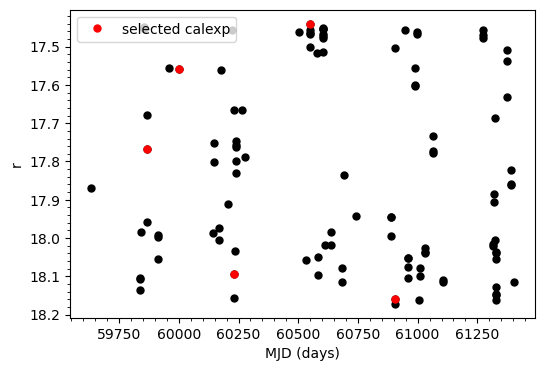

In [19]:
fig = plt.figure(figsize=(6, 4))
plt.plot(sorted_sources['expMidptMJD'],
         sorted_sources['psfMag'],
         'k.', ms=10)
plt.plot(sorted_sources[idx_select]['expMidptMJD'],
         sorted_sources[idx_select]['psfMag'],
         'r.', ms=10, label='selected calexp')
plt.minorticks_on()
plt.xlabel('MJD (days)')
plt.ylabel('r')
plt.gca().invert_yaxis()
plt.legend(loc=2)
plt.show()

### 2.6 Save images and write the `manifest.csv` to file
This tutorial section utilizes plotting utilities, which are stored in the `utils.py` file.

Define the directory where the flipbook images will be saved (`batch_dir`). Then running through the list of moments in time, create calexp images, and add a row to the manifest file for each image.

ra 59.4814837 dec -37.7323315


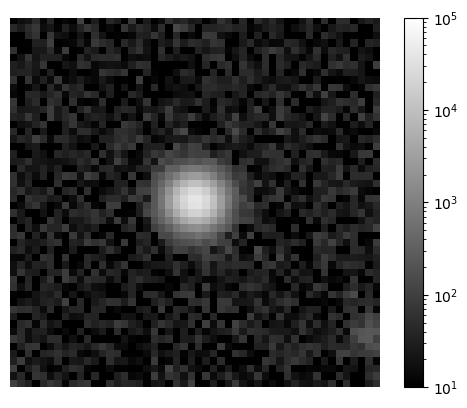

ra 59.4814837 dec -37.7323315


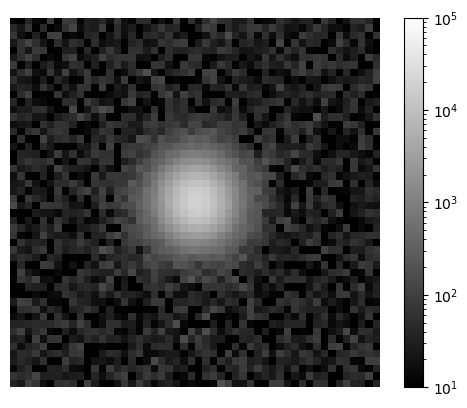

ra 59.4814837 dec -37.7323315


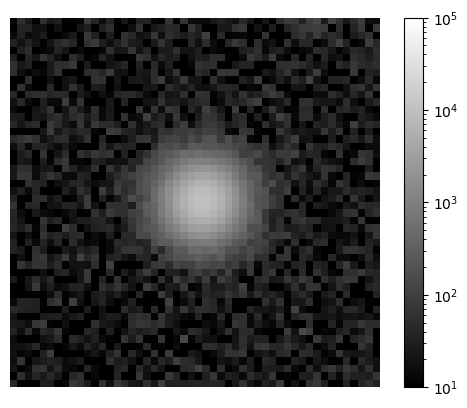

ra 59.4814837 dec -37.7323315


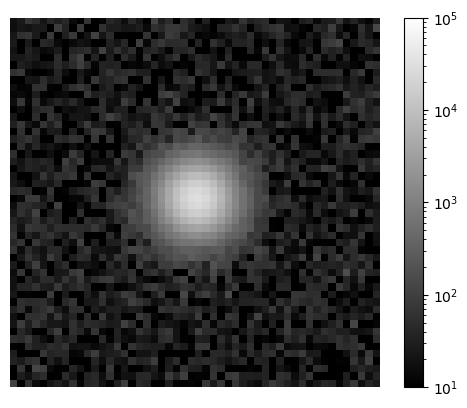

ra 59.4814837 dec -37.7323315


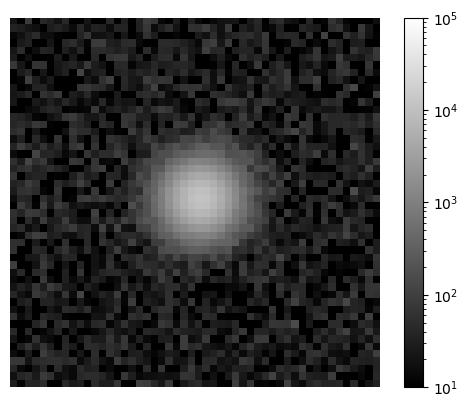

In [25]:
batch_dir = './variable_stars_output/'
figout_data = {"sourceId": diaobjectid}
cutouts = []

for i, idx in enumerate(idx_select):
    star_ra = sorted_sources['ra'][idx]
    star_dec = sorted_sources['decl'][idx]
    star_visitid = sorted_sources['visitId'][idx]
    star_detector = sorted_sources['detector'][idx]
    star_id = sorted_sources['diaObjectId'][idx]
    star_ccdid = sorted_sources['ccdVisitId'][idx]
    calexp_image = utils.cutout_calexp(butler,
                                       star_ra,
                                       star_dec,
                                       star_visitid,
                                       star_detector,
                                       50)
    figout = utils.make_calexp_fig(calexp_image,
                                   batch_dir + #"/images/" +
                                   str(star_id) + "_" +
                                   str(star_ccdid) + ".png")
    plt.show()
    del figout
    figout_data['location:image_'+str(i)] = str(star_id) + \
        "_" + str(star_ccdid) + ".png"
    figout_data['diaObjectId:image_'+str(i)] = str(star_id)
    figout_data['filename'] = str(star_id) + "_" + str(star_ccdid) + ".png"

df_manifest = pd.DataFrame(data=figout_data, index=[0])
outfile = batch_dir + "manifest.csv"
df_manifest.to_csv(outfile, index=False, sep=',')

### 2.7 Display images in notebook
Display the images saved to the manifest file using the image directory (`batch_dir`).

star 1567428592185376787


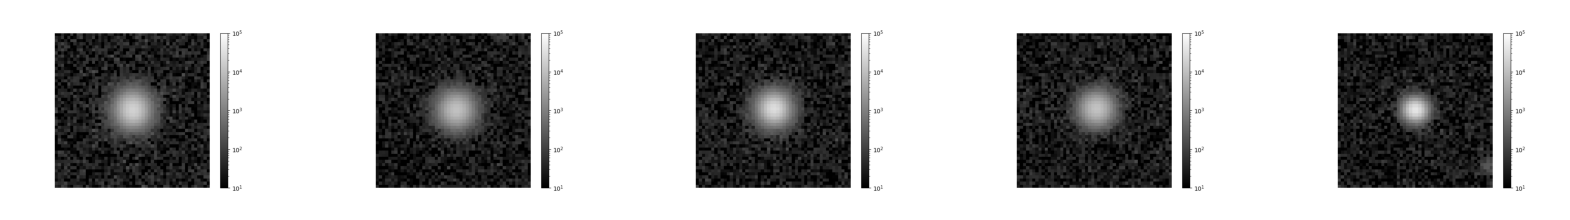

only one star


In [26]:
image_dir = batch_dir #+ 'images/'
num_variable_images = 5
stars_matchid_list = [diaobjectid]
star_name = np.zeros((1, num_variable_images))
star_name = []
for i, id_star in enumerate(stars_matchid_list):
    # go through and sort by ccdID so that they are in order of time
    # DOUBLE CHECK THAT THIS IS TIME ORDER
    ccdid_list = []
    for j, file in enumerate(os.listdir(image_dir)):
        if (str.split(file, '.')[1] == 'png' and
                str.split(file, '_')[0] == str(id_star)):
            img_id = int(str.split(str.split(file, '_')[1], '.')[0])
            star_name.append(str(id_star) + '_' +
                             str(img_id) + '.png')

fig, axs = plt.subplots(1, 5, figsize=(20, 20))
print('star', stars_matchid_list[0])
for j in range(num_variable_images):
    image = mpimg.imread(image_dir + star_name[j])
    axs[j].imshow(image)
    axs[j].axis('off')
plt.show()

try:
    print('star', stars_matchid_list[1])
    fig, axs = plt.subplots(1, 5, figsize=(20, 20))

    for j in range(num_variable_images):
        image = mpimg.imread(image_dir + star_name[j + num_variable_images])
        axs[j].imshow(image)
        axs[j].axis('off')
    plt.show()

except IndexError:  # this will happen if you have only one star
    print('only one star')


The third and fifth image should be the brightest.

### A word of caution
These are calexp images, which have not been aligned like individual visits that are combined in a deepcoadd image. Therefore, the pixelscale is not guaranteed to be the same from one image to the next and the astrometry is not guaranteed to align. 

## 3. Send the data to Zooniverse
Zip up the data and send it to the Zooniverse.

### 3.1 Zip up the data
Running the below cell will zip up all the cutouts into a single file - this can take 5 to 10 minutes for large data sets (> 5k cutouts).

In [27]:
zip_path = cit_sci_pipeline.zip_image_cutouts(batch_dir)
print(zip_path)

['./83d9a9c3-7cc2-4158-82b7-c22079e00342.zip', '83d9a9c3-7cc2-4158-82b7-c22079e00342.zip']


### 4.2 Send image data
This cell will let PIs send one subject set. Name the subject set as it will appear on Zooniverse.

Running this cell will also initiate the data transfer and make your data available on the Zooniverse platform.

In [28]:
subject_set_name = "blah"
cit_sci_pipeline.send_image_data(subject_set_name, zip_path)

Send the data to Zooniverse


'1. Checking batch status'

'2. Uploading the citizen science data'

'3. Creating a new Zooniverse subject set'

'4. Notifying the Rubin EPO Data Center of the new data, which will finish processing of the data and notify Zooniverse'

'5. Cleaning up unused subject set on the Zooniverse platform, vendor_batch_id : 119687'

'6. Cleaning up unused subject set on the Zooniverse platform, vendor_batch_id : 119687'